In [1]:
using TracyWidomBeta,LinearAlgebra,Statistics,SparseArrays,Distributions,Trapz,ApproxFun,SpecialFunctions
using RandomMatrices,Plots,LaTeXStrings,TypedTables,StatsBase,FFTW

The following plots show the limiting distributions of other eigenvalues.

In [4]:
function other(β)
    p=Plots.plot()
    L=1:3
    M=10^3
    # Set up the time domain
    x0=13.0;xN=-10.0;Δx=-0.01;x=x0:Δx:xN;xl=length(x)
    
    Φ = x -> erf.(x/sqrt(2))/2 + 0.5
    dϕ = x -> exp.(-x^2/2)*1/sqrt(2pi)
    g = (x0,β,t) -> Φ( (x0 - cot(t).^2)./sqrt.(4/β * cot.(t)) )
    h0 = (x0,β,t) -> t < pi/2 ? g(x0,β,t) : 1.0
    mgrid=(n,L) -> L*(1:n)/n
    
    for i=1:length(L)
        
        # Set up the initial condition
        θ=mgrid(M,L[i]*pi)
        h=(1/M)*L[i]*pi
        c0=map(t -> h0(x0,β,t),θ)
        final_pdf=zeros(xl,1)
        final_pdf[1]=0

        # Set up the discretization matrices
        T=spdiagm(0=>fill(-2.0,M),1=>fill(1.0,M-1),-1=>fill(1.0,M-1))
        tt=(-2*(sin.(θ)).^4)/(β*(h^2))
        T=spdiagm(0=>vec(tt))*T
        um1=ones(Int64,M-2,1);um1=vcat(um1,4);ud=zeros(Int64,M-1,1);ud=vcat(ud,-3);um2=zeros(Int64,M-3,1);um2=vcat(um2,-1)
        U=spdiagm(0=>vec(ud),1=>fill(-1.0,M-1),-1=>vec(um1),-2=>vec(um2))

        # Step forward with trapezoidal rule
        for j=1:xl-1
            u1=(1/(2*h))*((x[j].+(2*sin.(2*θ))/β).*(sin.(θ)).^2-(cos.(θ)).^2)
            U1=spdiagm(0=>vec(u1))*U
            u2=(1/(2*h))*((x[j+1].+(2*sin.(2*θ))/β).*(sin.(θ)).^2-(cos.(θ)).^2)
            U2=spdiagm(0=>vec(u2))*U
            rhs=(I+(Δx/2)*T+(Δx/2)*U1)*c0
            lhs=I-(Δx/2)*T-(Δx/2)*U2
            c0=lhs\rhs;
            final=T*c0+U2*c0
            final_pdf[j+1]=final[end]
        end
        left=findall(x->x==-9,x)[1]
        right=findall(x->x==3,x)[1]
        if i==1
            p=plot!(x[right:left],final_pdf[right:left],lw=5,label="Largest",xtickfontsize=15,ytickfontsize=15,
                legendfontsize=12)
        elseif i==2
            p=plot!(x[right:left],final_pdf[right:left],lw=5,label="Second Largest",xtickfontsize=15,ytickfontsize=15,
                legendfontsize=12)
        elseif i==3
            p=plot!(x[right:left],final_pdf[right:left],lw=5,label="Third Largest",xtickfontsize=15,ytickfontsize=15,
                legendfontsize=12)
        end
    end
    return p
end

other (generic function with 1 method)

For $\beta=3$, we have

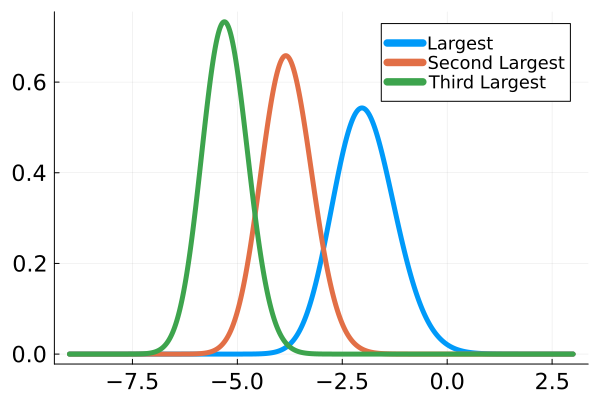

In [5]:
other(3)

For $\beta=5$, we have

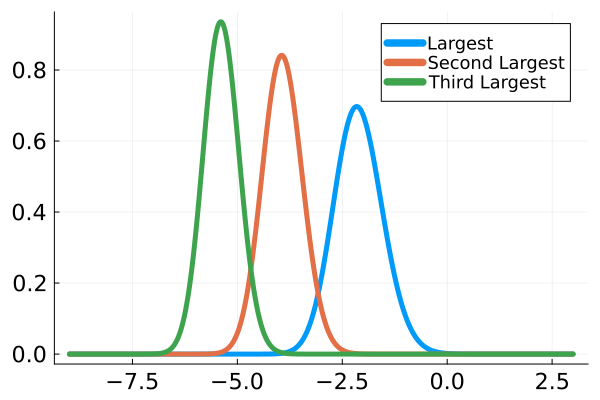

In [6]:
other(5)

For $\beta=6$, we have

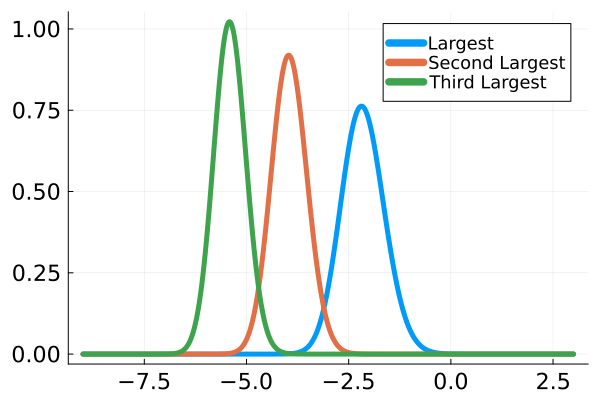

In [7]:
other(6)

For $\beta=7$, we have

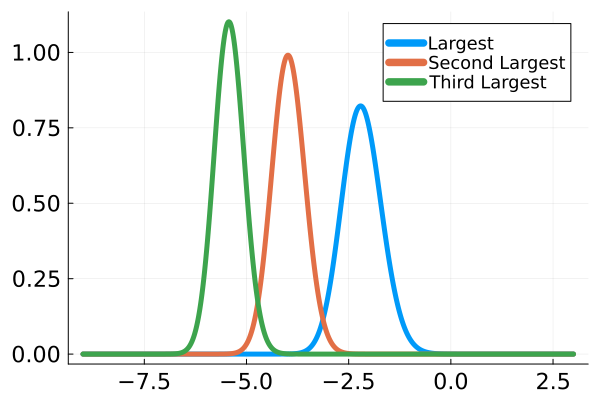

In [8]:
other(7)